In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import sqrt
from sklearn import svm


# 7. Attribute information

# 1) ID number
# 2) Diagnosis (M = malignant, B = benign)
# 3-32)

# Ten real-valued features are computed for each cell nucleus:

#	a) radius (mean of distances from center to points on the perimeter)
#	b) texture (standard deviation of gray-scale values)
#	c) perimeter
#	d) area
#	e) smoothness (local variation in radius lengths)
#	f) compactness (perimeter^2 / area - 1.0)
#	g) concavity (severity of concave portions of the contour)
#	h) concave points (number of concave portions of the contour)
#	i) symmetry 
#	j) fractal dimension ("coastline approximation" - 1)

# The mean, standard error, and "worst" or largest (mean of the three
# largest values) of these features were computed for each image,
# resulting in 30 features.  For instance, field 3 is Mean Radius, field
# 13 is Radius SE, field 23 is Worst Radius.

dataset_fpath = "wdbc.data"

element_names = ["mean", "standard_err", "largest"]

feature_names = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", 
                 "concave_points", "symmetry", "fractal_dimension"]
column_names = ["ID",  "diagnosis"] + [feat + " " + el for el in element_names for feat in feature_names]

In [2]:
print(column_names)

['ID', 'diagnosis', 'radius mean', 'texture mean', 'perimeter mean', 'area mean', 'smoothness mean', 'compactness mean', 'concavity mean', 'concave_points mean', 'symmetry mean', 'fractal_dimension mean', 'radius standard_err', 'texture standard_err', 'perimeter standard_err', 'area standard_err', 'smoothness standard_err', 'compactness standard_err', 'concavity standard_err', 'concave_points standard_err', 'symmetry standard_err', 'fractal_dimension standard_err', 'radius largest', 'texture largest', 'perimeter largest', 'area largest', 'smoothness largest', 'compactness largest', 'concavity largest', 'concave_points largest', 'symmetry largest', 'fractal_dimension largest']


In [3]:
df = pd.read_csv(dataset_fpath, names=column_names)

# a. What are the mean, median and standard deviation of the “perimeter” feature?

# Computing the mean of the "perimeter mean" column:
perimeter_mean_entries = df["perimeter mean"].tolist()
perimeter_mean_overall = sum(perimeter_mean_entries) / len(perimeter_mean_entries)

print(round(perimeter_mean_overall,2))

91.97


In [4]:
# median
perimeter_mean_entries_sorted = sorted(perimeter_mean_entries)
midpoint = len(perimeter_mean_entries) // 2
perimeter_median = perimeter_mean_entries_sorted[midpoint]

print(round(perimeter_median, 2))

86.24


In [5]:
# standard deviation

squared_diffs = [(x_i - perimeter_mean_overall)**2 for x_i in perimeter_mean_entries]
num_samples = len(squared_diffs)
perimeter_std_dev = sqrt(sum(squared_diffs) / num_samples)
print(round(perimeter_std_dev,2))

24.28


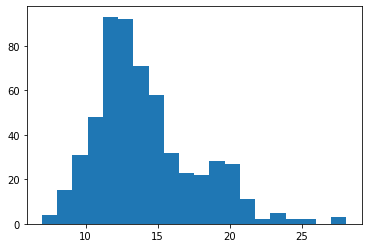

Considering the visualization, we state that the radius feature does not follow a normal distribution because it is not symmetric.
Fisher-Pearson skewness coefficient==0.94, which is !=0

We hypothesize that an exponential distribution would be closer.


In [6]:
# b. Is the first feature in this data set (the “radius”) normally distributed? Quantify your answer. 
# If not, what might be a more appropriate statistical distribution for modelling purposes?

radius_mean_entries = df["radius mean"].tolist()
radius_sample_mean = round(sum(radius_mean_entries) / len(radius_mean_entries),2)
radius_squared_diffs = [(x_i - radius_sample_mean)**2 for x_i in radius_mean_entries]
radius_std_dev = sqrt(sum(radius_squared_diffs) / len(radius_squared_diffs))

# plot bins
n,bins,patches = plt.hist(radius_mean_entries, bins=20)
plt.show()

print("Considering the visualization, we state that the radius feature does not follow a normal distribution because it is not symmetric.")
skew_coefficient = (sum([(x_i - radius_sample_mean)**3 for x_i in radius_mean_entries]) \
                    / len(radius_mean_entries))                                         \
                    /(radius_std_dev**3)
print("Fisher-Pearson skewness coefficient==" + str(round(skew_coefficient,2)) + ", which is !=0")

print("\nWe hypothesize that an exponential distribution would be closer.")

In [7]:
# c. Train a classifier to predict the diagnosis of malignant or benign. Compare the results of two classifiers 
# (e.g. SVM, logistic regression and/or decision tree) and make some suggestions on how the classifier’s performance could be further improved.

# Preliminary step 1: normalize/standardize the data columns
# standardization to \mu=0 and \sigma=1
df_standardized = df.copy()
for feature_col in column_names[2:]:  # skip "ID" and "Diagnosis"
    col_ls = df[feature_col].tolist()
    col_avg = sum(col_ls) / len(col_ls)
    col_squared_diffs = [(x_i - col_avg)**2 for x_i in col_ls]
    col_std_dev = sqrt(sum(col_squared_diffs) / len(col_squared_diffs))
    df_standardized[feature_col] = df_standardized[feature_col] - col_avg)/col_std_dev
    
df_standardized['diagnosis'] = df_standardized['diagnosis'].map(lambda label: 1 if label=="M" else 0)

# Preliminary step 2: split into training and test sets
n = df_standardized.index.stop
training_df = df_standardized.iloc[:int(9/10*n),]
training_labels_df = training_df["diagnosis"]
training_df.drop(columns=["ID", "diagnosis"], inplace=True)

test_df = df_standardized.iloc[int(9/10*n):n,]



C:\Users\Andre\miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
# transform training set columns into numpy arrays for the SVC
training_x = training_df.to_numpy()
# and the labels too
training_y = training_labels_df.to_numpy()
print(training_x)
print(training_y)

svc = svm.SVC(cache_size=500)
SVC().fit(training_x, training_y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.37850807  1.08449508  0.48731988 ...  1.5484502   0.18158663
   1.26094164]
 [-0.67802474 -1.07036908 -0.64499872 ... -0.13713413 -0.48008564
   0.82260252]
 [ 0.19389884 -1.06804202  0.11084145 ... -0.533787   -0.9168864
  -1.24828658]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 

NameError: name 'SVC' is not defined